# Encoding,Dimentionality reduction and Feature selection 
<!-- using Allele frequency conservation   -->

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from complexcgr import CGR
from pathlib import Path

In [60]:
def one_hot_encoding_dim_reduction(df_in,category):
    dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
    snp_data = df_in.drop(columns=dropped_columns)
    print(f"The initial features are {df_in.shape[1]}")
    encoded_categorical=pd.get_dummies(snp_data,dtype=int)
    print(f"The initial features  after one hot encoding are {encoded_categorical.shape[1]}")

    # Calculate the frequency of 1 for each SNP column
    column_frequencies = encoded_categorical.mean()
    # Set a threshold for high conservation
    conservation_threshold = 0.9
    # Identify highly conserved SNP loci
    highly_conserved_loci = column_frequencies[column_frequencies > conservation_threshold]
    # Remove columns containing '_N' from highly conserved loci
    highly_conserved_filtered = highly_conserved_loci[highly_conserved_loci.index.str.contains('_N') == False]
    # Get DataFrame with the filtered columns
    filtered_columns = highly_conserved_filtered.index.tolist()
    df_filtered = encoded_categorical[filtered_columns]
    df_filtered 
    # Select informative SNP columns
    # Combine non-categorical variables with informative SNP columns
    data_combined = pd.concat([df_in[dropped_columns], df_filtered], axis=1)
    # Get the top ten conserved alleles
    data_combined.to_csv(f"{category}.csv",index=False)
    top_ten_conserved = df_filtered.mean().nlargest(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    top_ten_conserved.plot(kind='bar', color='blue')
    plt.title(f"Top Ten Conserved SNP's in {category}")
    plt.xlabel('Allele')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Save the plot as a PNG file
    plt.savefig(f'../../../salmonellaml/salmonellaml/figures/top_ten_conserved_SNP_{category}.png')
    plt.show()
    return data_combined

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def label_encoding_dim_reduction(df_in, category):
    dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
    snp_data = df_in.drop(columns=dropped_columns)
    print(f"The initial features are {df_in.shape[1]}")

    # Create a custom label encoding map
    custom_encoding_map = {'N': 0, 'A': 1, 'T': 2, 'G': 3, 'C': 4}
    
    # Apply custom label encoding to categorical columns
    categorical_cols = snp_data.select_dtypes(include=['object']).columns
    snp_data[categorical_cols] = snp_data[categorical_cols].apply(lambda col: col.map(custom_encoding_map))
    
    print(f"The initial features after custom label encoding are {snp_data.shape[1]}")

    # Calculate the frequency of 1 for each SNP column
    column_frequencies = snp_data.mean()
    # Set a threshold for high conservation
    conservation_threshold = 0.9
    # Identify highly conserved SNP loci
    highly_conserved_loci = column_frequencies[column_frequencies > conservation_threshold]
    # Remove columns containing '_N' from highly conserved loci
    highly_conserved_filtered = highly_conserved_loci[highly_conserved_loci.index.str.contains('_N') == False]
    # Get DataFrame with the filtered columns
    filtered_columns = highly_conserved_filtered.index.tolist()
    df_filtered = snp_data[filtered_columns]

    # Combine non-categorical variables with informative SNP columns
    data_combined = pd.concat([df_in[dropped_columns], df_filtered], axis=1)
    data_combined.to_csv(f"{category}_custom_label_encoded.csv", index=False)
    top_ten_conserved = df_filtered.mean().nlargest(20)

    # Plotting
    plt.figure(figsize=(10, 6))
    top_ten_conserved.plot(kind='bar', color='blue')
    plt.title(f"Top Ten Conserved SNP's in {category}")
    plt.xlabel('genomic position of the SNP')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Save the plot as a PNG file
    plt.savefig(f'../../../salmonellaml/salmonellaml/figures/top_ten_conserved_SNP_{category}_custom_label_encoded.png')
    plt.show()
    return data_combined

# Example usage
# df = ...  # Load your DataFrame here
# result = custom_label_encoding_dim_reduction(df, "CategoryName")


In [62]:
# # load data
# df=pd.read_csv("../data/nigeria_poultry_metadata.csv")
# df

The initial features are 245904
The initial features  after one hot encoding are 499774


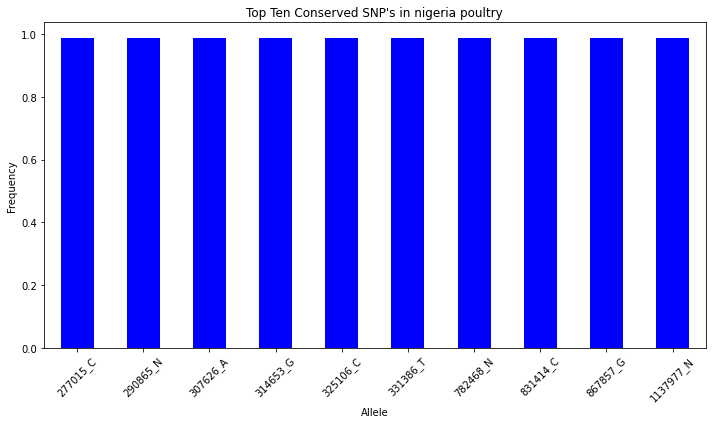

,Isolation source,category,BioSample,sra_accession,country,40_N,1647_C,2088_G,2136_N,2493_G,...,4486464_N,4745998_N,4746010_N,4746025_N,4746046_N,4746058_N,4746064_N,4746067_N,4746068_N,4746070_N
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Poultry vendoors and farms,poultry,SAMEA6869863,ERR4183583,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
80,Poultry vendoors and farms,poultry,SAMEA6869864,ERR4183584,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
81,Poultry vendoors and farms,poultry,SAMEA6869865,ERR4183585,nigeria,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
82,Poultry vendoors and farms,poultry,SAMEA6869866,ERR4183586,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [154]:
df_poultry=one_hot_encoding_dim_reduction(df,"nigeria poultry")
df_poultry

In [ ]:
# # load data
# df_po_cat=pd.read_csv("../data/nigeria_poultry_metadata.csv")


The initial features are 245904
The initial features after custom label encoding are 245899


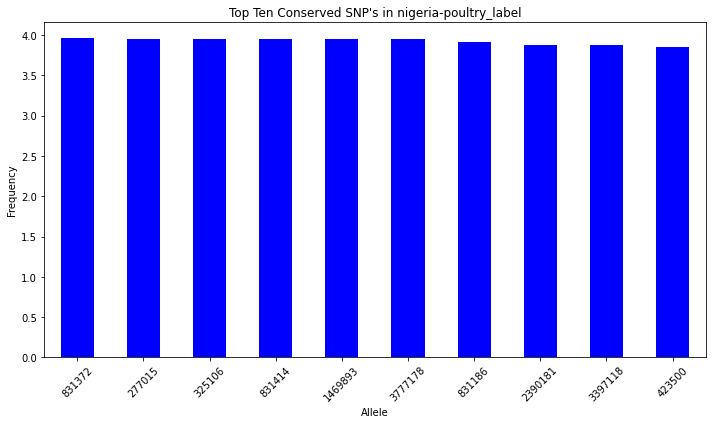

,Isolation source,category,BioSample,sra_accession,country,646,681,793,1242,1251,...,1621519,3338451,3768365,3959527,2082024,2648971,3882772,4090023,4771053,4801814
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,2,4,0,2,0,...,4,4,4,4,0,4,4,0,4,0
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,2,4,0,0,0,...,0,0,0,0,0,0,4,0,0,0
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,0,0,0,2,0,...,0,0,0,0,4,0,0,0,0,0
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,2,0,4,2,0,...,0,4,0,4,0,0,0,0,0,0
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,2,4,0,2,0,...,0,4,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Poultry vendoors and farms,poultry,SAMEA6869863,ERR4183583,nigeria,2,0,0,2,0,...,4,4,4,4,4,4,4,4,4,4
80,Poultry vendoors and farms,poultry,SAMEA6869864,ERR4183584,nigeria,2,4,0,0,0,...,0,0,0,0,0,0,4,0,0,0
81,Poultry vendoors and farms,poultry,SAMEA6869865,ERR4183585,nigeria,2,4,4,2,4,...,0,0,0,0,0,0,0,0,0,0
82,Poultry vendoors and farms,poultry,SAMEA6869866,ERR4183586,nigeria,2,0,0,2,4,...,4,0,0,0,0,0,4,4,0,4


In [9]:
df_poultry=label_encoding_dim_reduction(df_po_cat,"nigeria-poultry_label")
df_poultry

The initial features are 345183
The initial features after custom label encoding are 345178


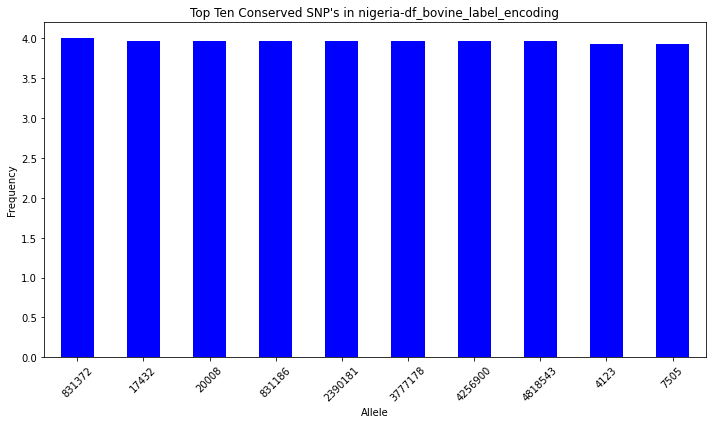

,Isolation source,category,BioSample,sra_accession,country,480,534,646,681,793,...,3355393,1399607,2078556,2078559,735489,1719830,4018147,2353206,89604,3629001
0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,3,4,2,4,4,...,0,4,3,4,0,4,0,0,0,0
1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,3,4,2,4,0,...,0,4,3,4,0,0,0,0,0,0
2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,3,4,2,4,4,...,4,4,3,4,4,4,4,0,0,0
3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,3,4,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,3,4,2,4,4,...,0,0,0,0,4,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,beef,bovine,SAMN31852854,SRR22395760,nigeria,0,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
100,beef,bovine,SAMN31852864,SRR22395764,nigeria,3,4,2,0,4,...,0,0,0,0,0,0,0,0,0,0
101,beef,bovine,SAMN31852862,SRR22395766,nigeria,0,4,2,4,4,...,0,0,0,0,0,0,0,0,0,0
102,beef,bovine,SAMN31852861,SRR22395767,nigeria,3,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# load data
df_bo_cat=pd.read_csv("../data/nigeria_bovine_metadata.csv")

df_bo=label_encoding_dim_reduction(df_bo_cat,"nigeria-df_bovine_label_encoding")
df_bo

The initial features are 297317
The initial features after custom label encoding are 297312


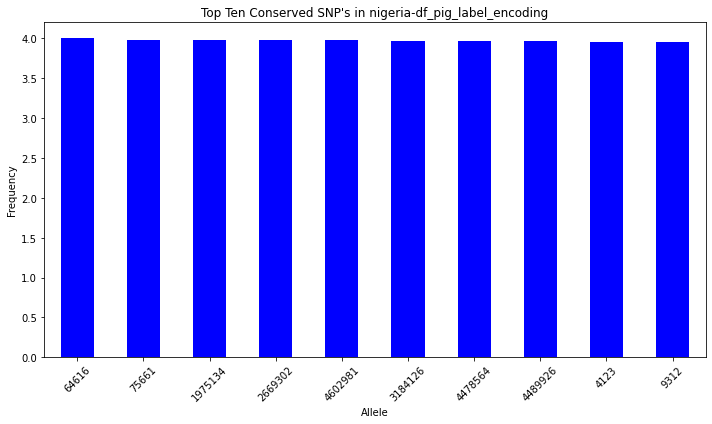

,Isolation source,category,BioSample,sra_accession,country,534,646,681,793,1047,...,2204997,92161,219591,1892467,2031386,2595382,4471229,435879,3503680,4720760
0,pig stool,swine,SAMN07135307,SRR6950097,nigeria,4,2,4,4,2,...,0,0,0,0,0,0,0,0,0,0
1,pig stool,swine,SAMN07135306,SRR6950133,nigeria,4,2,4,4,2,...,0,0,0,0,0,0,0,0,0,0
2,pig stool,swine,SAMN07135305,SRR6950194,nigeria,4,2,4,4,2,...,0,0,0,0,0,0,0,0,0,0
3,pig stool,swine,SAMN07135304,SRR6950215,nigeria,4,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,pig stool,swine,SAMN07135293,SRR6950217,nigeria,4,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,4,2,4,4,0,...,0,0,0,4,0,0,0,0,0,0
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,4,2,4,4,0,...,4,0,4,4,0,4,4,0,0,0
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,4,2,0,4,0,...,0,0,4,0,4,0,0,0,4,0
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,4,0,4,4,2,...,0,4,0,4,4,0,0,0,0,4


In [11]:
# load data
df_pig_cat=pd.read_csv("../data/nigeria_pig_metadata.csv")

df_pig_cat=label_encoding_dim_reduction(df_pig_cat,"nigeria-df_pig_label_encoding")
df_pig_cat

In [14]:
df_all_label_encoded=pd.concat([df_poultry,df_bo,df_pig_cat]).fillna(0)
df_all_label_encoded

,Isolation source,category,BioSample,sra_accession,country,646,681,793,1242,1251,...,4114998,4121536,4223028,4224292,4226470,4393282,4568565,4836103,219591,4720760
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,2,4,0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,2,4,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,0,0,0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,2,0,4,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,2,4,0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,2,4,4,2,4.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,2,4,4,2,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,4.0,0.0
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,2,0,4,2,4.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,0,4,4,0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0


In [15]:
df_all_label_encoded.to_csv("label_encoded_training_data.csv",index=False)

In [ ]:
# df_all_label_encoded=pd.concat([df_poultry,df_bo,df_pig_cat])
# df_all_label_encoded

In [61]:
df_all_label_encoded["category"].value_counts()

category
poultry    252
Name: count, dtype: int64

In [59]:
df_all_label_encoded=df_all_label_encoded.fillna(0)
df_all_label_encoded.to_csv("training_label_encoded.csv")

In [4]:
df=pd.read_csv("./nigeria poultry.csv")
df_poulty=df.drop(columns=["Unnamed: 0"])

In [5]:
# load data
# df_pig=pd.read_csv("../data/nigeria_pig_metadata.csv")
df_pig=pd.read_csv("./nigeria pig.csv")
df_pig=df_pig.drop(columns=["Unnamed: 0"])
df_pig

,Isolation source,category,BioSample,sra_accession,country,534_C,1242_T,1410_C,2493_G,2607_G,...,2955753_C,2955769_C,3113583_A,3155847_G,3918057_C,3918075_G,3918081_G,3918120_A,4846602_G,3304610_C
0,pig stool,swine,SAMN07135307,SRR6950097,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,pig stool,swine,SAMN07135306,SRR6950133,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,pig stool,swine,SAMN07135305,SRR6950194,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,pig stool,swine,SAMN07135304,SRR6950215,nigeria,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,pig stool,swine,SAMN07135293,SRR6950217,nigeria,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,1,1,1,1,1,...,0,0,1,1,1,1,1,1,0,1
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1


The initial features are 297317
The initial features  after one hot encoding are 606544


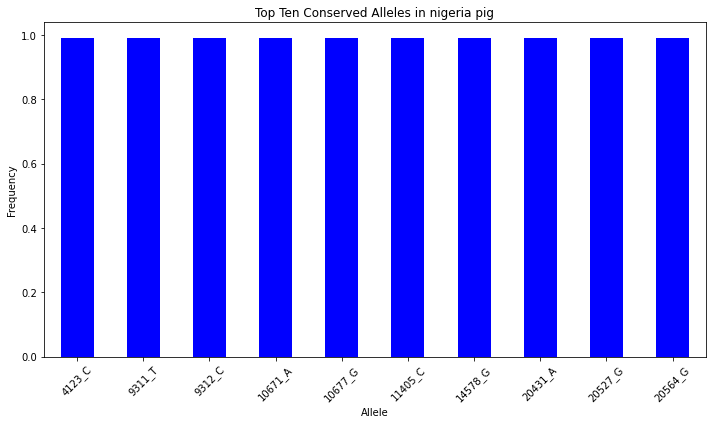

,Isolation source,category,BioSample,sra_accession,country,534_C,1242_T,1410_C,2493_G,2607_G,...,2955753_C,2955769_C,3113583_A,3155847_G,3918057_C,3918075_G,3918081_G,3918120_A,4846602_G,3304610_C
0,pig stool,swine,SAMN07135307,SRR6950097,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,pig stool,swine,SAMN07135306,SRR6950133,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,pig stool,swine,SAMN07135305,SRR6950194,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,pig stool,swine,SAMN07135304,SRR6950215,nigeria,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,pig stool,swine,SAMN07135293,SRR6950217,nigeria,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,1,1,1,1,1,...,0,0,1,1,1,1,1,1,0,1
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
df_pig=one_hot_encoding_dim_reduction(df_pig,"nigeria pig")
df_pig

In [6]:
df_bovine=pd.read_csv("nigeria bovine.csv")
df_bovine=df_bovine.drop(columns=["Unnamed: 0"])
df_bovine

,Isolation source,category,BioSample,sra_accession,country,534_C,1242_T,1647_C,2088_G,2493_G,...,4844535_C,4856784_C,184314_G,387554_A,387622_G,387658_G,391456_C,1682255_C,3577698_T,3732615_A
0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,beef,bovine,SAMN31852854,SRR22395760,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100,beef,bovine,SAMN31852864,SRR22395764,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
101,beef,bovine,SAMN31852862,SRR22395766,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
102,beef,bovine,SAMN31852861,SRR22395767,nigeria,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1


In [65]:
df_bovine=pd.read_csv("kenya_swine_processed.csv")
df_bovine

# df_bovine=df_bovine.drop(co)
# df_bovine

,Unnamed: 0,BioSample,Isolation source,sra_accession,country,15,27,78,480,504,...,4839562,4841514,4841563,4843995,4851006,4853017,4855381,20462,65978,2914287
0,0,SAMN03576958,feces swine,SRR2163243,kenya,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
1,1,SAMN03576962,feces swine,SRR2163246,kenya,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
2,2,SAMN03576963,feces swine,SRR2163247,kenya,N,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
3,3,SAMN03576956,feces swine,SRR2163254,kenya,T,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
4,4,SAMN03576959,feces swine,SRR2163255,kenya,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,SAMN03577020,feces swine,SRR2981160,kenya,N,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
69,69,SAMN03577015,feces swine,SRR2981161,kenya,N,N,N,G,N,...,N,N,N,N,N,N,N,N,N,N
70,70,SAMN03577005,feces swine,SRR2981162,kenya,N,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
71,71,SAMN03577026,feces swine,SRR3272062,kenya,N,N,N,G,N,...,N,N,N,N,N,N,N,N,N,N


In [74]:
df_tunisia=pd.read_csv("../data/tunisia_processed.csv")
# df_tunisia=pd.read_csv("../data/tunisia_processed.csv")


In [75]:
def category_allocation(df_data):
    # List of terms related to various categories
    bovine_terms = ['cattle stool','stool (Bos taurus)','intestine cattle','GOAT','GOAT MEAT','cattle lung', 'cattle', 'beef', 'cattle stool (Bos taurus)']
    poultry_terms = ['poultry feed', 'Poultry vendoors and farms', 'chicken heart', 'Poultry small intenstine',
                     'Poultry carcass', 'chicken liver', 'Chicken Spleen', 'chicken', 'poultry water']
    swine_terms=["feces swine","swine","swine stool","pig stool"]

    # Create the dictionary for replacement
    replacement_dict = {}
    for term in bovine_terms:
        replacement_dict[term] = 'bovine'
    for term in poultry_terms:
        replacement_dict[term] = 'poultry'
    for term in swine_terms:
        replacement_dict[term] = 'swine'

    # Function to replace terms based on the dictionary
    def replace_terms(description):
        for term, replacement in replacement_dict.items():
            if term in description:
                return replacement
        return description

    # Create the 'category' column using apply
    df_data['category'] = df_data['Isolation source'].apply(replace_terms)

    # Reorder the columns to insert 'category' as the second column
    column_order = ['Isolation source', 'category'] + [col for col in df_data.columns if col != 'Isolation source' and col != 'category']
    df_new = df_data[column_order]

    return df_new

The initial features are 317598
The initial features after custom label encoding are 317593


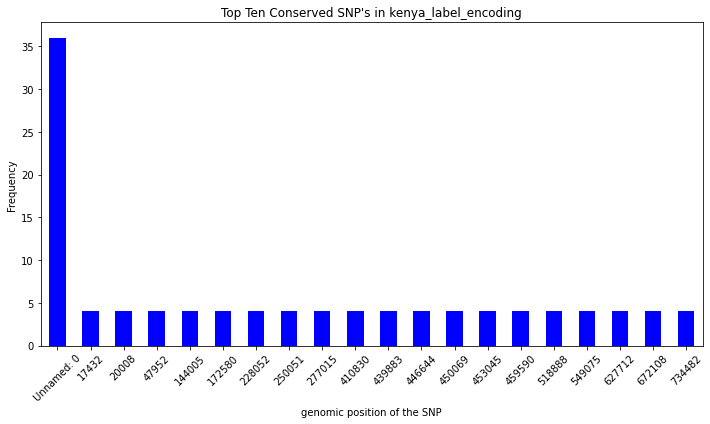

,Isolation source,category,BioSample,sra_accession,country,Unnamed: 0,480,534,681,1149,...,4311254,4350184,4560530,4595828,4682440,4720153,1720927,1720929,2240961,4221396
0,feces swine,swine,SAMN03576958,SRR2163243,kenya,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,feces swine,swine,SAMN03576962,SRR2163246,kenya,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,feces swine,swine,SAMN03576963,SRR2163247,kenya,2,3,4,4,2,...,0,0,0,0,0,0,0,0,0,0
3,feces swine,swine,SAMN03576956,SRR2163254,kenya,3,3,4,0,2,...,0,0,0,0,0,0,0,0,0,0
4,feces swine,swine,SAMN03576959,SRR2163255,kenya,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,feces swine,swine,SAMN03577020,SRR2981160,kenya,68,3,4,4,2,...,0,0,0,0,0,0,0,0,0,0
69,feces swine,swine,SAMN03577015,SRR2981161,kenya,69,3,4,0,2,...,4,4,4,4,4,4,0,0,0,0
70,feces swine,swine,SAMN03577005,SRR2981162,kenya,70,3,4,4,2,...,0,0,0,0,0,0,0,0,0,0
71,feces swine,swine,SAMN03577026,SRR3272062,kenya,71,3,4,4,2,...,0,0,4,4,0,4,4,4,4,4


In [69]:
# category_allocation(df_bovine)
df_kenya_cat=label_encoding_dim_reduction(df_bovine,"kenya_label_encoding")
df_kenya_cat

The initial features are 316972
The initial features after custom label encoding are 316967


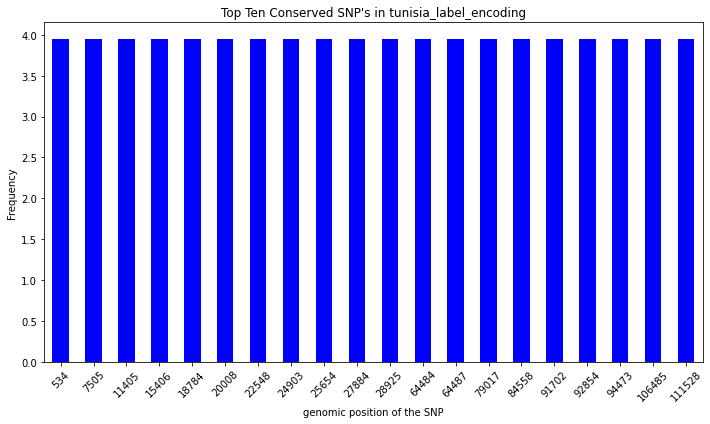

,Isolation source,category,BioSample,sra_accession,country,480,534,646,793,1410,...,4036740,2817207,611489,3443327,4518195,2817205,3519300,3902767,3519750,3519519
0,poultry,poultry,SAMN13527208,SRR10665530,tunisia,3,4,2,4,4,...,0,0,0,0,0,0,0,0,0,0
1,poultry,poultry,SAMN13527207,SRR10665531,tunisia,3,4,2,0,4,...,0,0,0,0,0,0,0,0,0,0
2,poultry,poultry,SAMN13527205,SRR10665533,tunisia,0,4,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,poultry,poultry,SAMN13527204,SRR10665534,tunisia,3,4,2,4,4,...,0,0,0,0,0,0,0,0,0,0
4,poultry,poultry,SAMN13527203,SRR10665535,tunisia,0,4,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Poultry liver,poultry,SAMN33426666,SRR23603310,tunisia,0,4,2,0,4,...,4,0,4,4,4,0,4,0,0,4
84,Poultry meat,poultry,SAMN33426665,SRR23603311,tunisia,0,4,0,0,4,...,0,3,0,4,0,3,0,4,4,0
85,Poultry meat,poultry,SAMN33426664,SRR23603312,tunisia,0,4,0,0,4,...,0,3,0,4,0,3,4,4,4,0
86,Poultry meat,poultry,SAMN33426663,SRR23603313,tunisia,0,4,0,0,4,...,0,3,0,4,0,3,0,4,4,4


In [76]:
# Tunisia
# category_allocation(df_bovine)
df_tunisia=label_encoding_dim_reduction(df_tunisia,"tunisia_label_encoding")
df_tunisia

In [76]:
# #common columns
# # common_columns = set(df1.columns) & set(df2.columns) & set(df3.columns)
# common_columns = set(df_poultry.columns) & set(df_pig.columns)  & set(df_bovine.columns)
# common_columns
# # # Initialize a list to store columns to drop
# columns_to_drop = []

# # Check if the SNP values are the same in all dataframes
# for col in common_columns:
#     if all(df_poultry[col].isin([0, 1])) and all(df_pig[col].isin([0, 1]))  and all(df_bovine[col].isin([0, 1])) :
#         if not (df_poultry[col].nunique() == 1 or df_pig[col].nunique() == 1 or df_bovine[col].nunique() == 1):
#             columns_to_drop.append(col)

# # Drop the common columns with varying SNP values
# df_poultry.drop(columns=columns_to_drop, inplace=True)
# df_pig.drop(columns=columns_to_drop, inplace=True)
# df_bovine.drop(columns=columns_to_drop, inplace=True)

In [8]:
df_all=pd.concat([df_poulty,df_bovine,df_pig])
df_all

,Isolation source,category,BioSample,sra_accession,country,1647_C,2088_G,2493_G,3982_G,7166_A,...,187701_C,1073652_T,2955753_C,2955769_C,3918057_C,3918075_G,3918081_G,3918120_A,4846602_G,3304610_C
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,1.0,1.0,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,1.0,1.0,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,1.0,1.0,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,1.0,1.0,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,1.0,1.0,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,NaN,NaN,1,1,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,NaN,NaN,1,1,NaN,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,NaN,NaN,1,1,NaN,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,NaN,NaN,1,1,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


The initial features are 43423
The initial features after custom label encoding are 43418


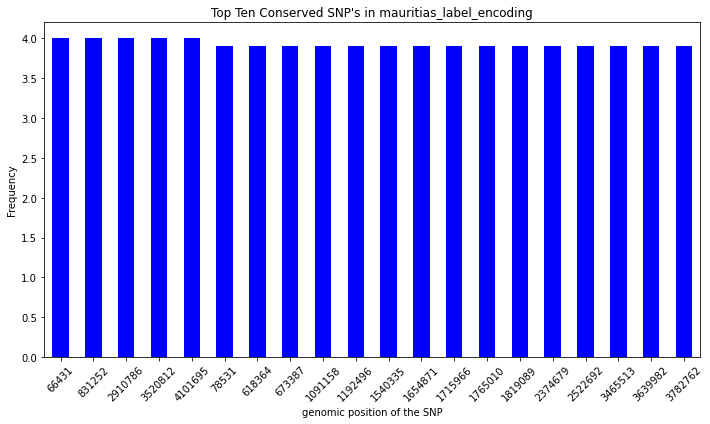

,Isolation source,category,BioSample,sra_accession,country,793,796,1125,1737,1804,...,3519750,3521406,4521736,65263,65264,3882682,4521713,4521731,4521735,4521737
0,chicken,poultry,SAMN02368622,SRR1840674,mauritias,0,0,0,0,0,...,0,0,3,4,4,4,4,4,4,4
1,raw chicken - Innodis,poultry,SAMN17861347,SRR13681353,mauritias,4,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
2,raw chicken,poultry,SAMN17861346,SRR13681354,mauritias,4,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
3,raw chicken,poultry,SAMN17861345,SRR13681355,mauritias,4,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
4,raw chicken - Prodigal,poultry,SAMN17861344,SRR13681356,mauritias,4,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
5,raw chicken,poultry,SAMN17861351,SRR13681357,mauritias,4,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
6,chicken - Chantecler,poultry,SAMN17861350,SRR13681358,mauritias,4,2,2,1,2,...,4,3,3,0,0,0,0,0,0,0
7,chicken - Prodigal,poultry,SAMN17861349,SRR13681359,mauritias,4,2,2,1,2,...,0,3,0,4,4,0,0,0,0,0
8,raw chicken - Prodigal,poultry,SAMN17861348,SRR13681360,mauritias,4,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
9,Raw chicken,poultry,SAMN29253043,SRR19787721,mauritias,4,2,2,1,2,...,4,3,3,4,4,4,4,4,4,4


In [81]:
# load data
df_mauritias=pd.read_csv("mauritias_processed.csv")

df_mauritias=label_encoding_dim_reduction(df_mauritias,"mauritias_label_encoding")
df_mauritias

The initial features are 151689
The initial features after custom label encoding are 151684


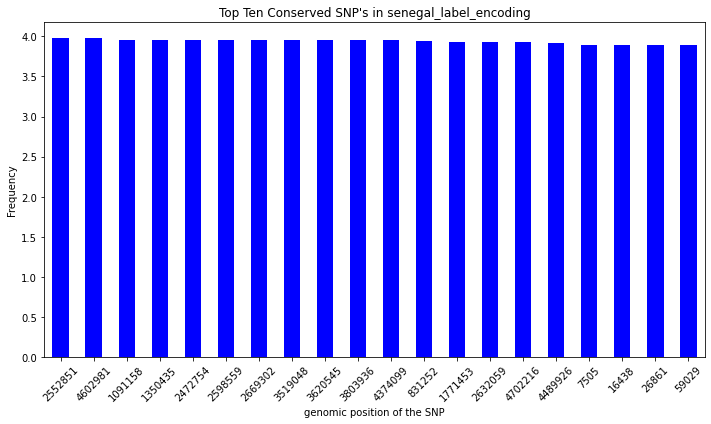

,Isolation source,category,BioSample,sra_accession,country,480,504,646,681,744,...,223554,420802,420805,420808,705132,751830,1243975,1408986,3806570,4155715
0,broiler chicken,poultry,SAMN12056294,SRR9301024,senegal,3,2,2,4,4,...,0,0,0,0,0,0,0,0,0,0
1,broiler chicken,poultry,SAMN12056293,SRR9301027,senegal,0,0,2,0,4,...,0,0,0,0,0,0,0,0,0,0
2,broiler chicken,poultry,SAMN12056318,SRR9301039,senegal,3,2,2,4,4,...,0,0,0,0,0,0,0,0,0,0
3,broiler chicken,poultry,SAMN12056331,SRR9301043,senegal,3,2,2,4,0,...,0,0,0,0,0,0,0,0,0,0
4,broiler chicken,poultry,SAMN12056335,SRR9301054,senegal,0,2,0,0,4,...,4,4,4,4,4,4,4,4,4,4
5,broiler chicken,poultry,SAMN12056343,SRR9301060,senegal,3,2,2,4,0,...,0,0,0,0,0,0,0,0,0,0
6,broiler chicken,poultry,SAMN12056361,SRR9301062,senegal,3,2,2,4,0,...,0,0,0,0,0,0,0,0,0,0
7,broiler chicken,poultry,SAMN12056362,SRR9301069,senegal,3,0,0,0,4,...,4,4,4,4,4,4,4,4,4,4
8,broiler chicken,poultry,SAMN12056355,SRR9301077,senegal,3,2,2,4,0,...,0,0,0,0,0,0,0,0,0,0
9,broiler chicken,poultry,SAMN12056359,SRR9301079,senegal,0,0,2,0,4,...,4,4,4,4,4,4,4,4,4,4


In [83]:
# load data
df_senegal=pd.read_csv("senegal_processed.csv")

df_senegal=label_encoding_dim_reduction(df_senegal,"senegal_label_encoding")
df_senegal

The initial features are 90670
The initial features after custom label encoding are 90665


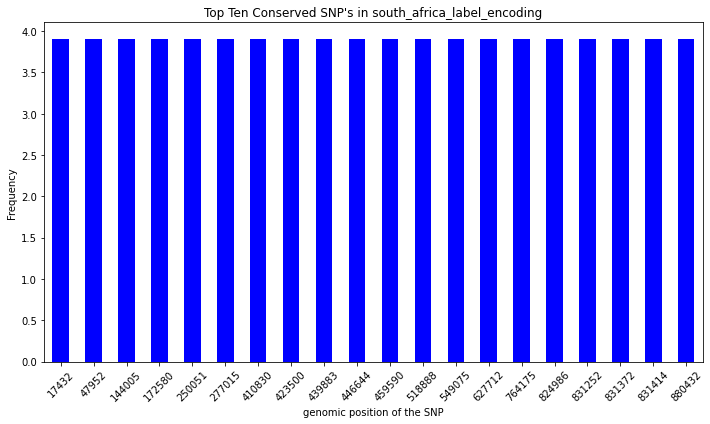

,Isolation source,category,BioSample,sra_accession,country,480,534,646,793,796,...,4847279,4853119,4855166,4855369,4856892,329336,420874,420880,450303,3951627
0,cow,bovine,SAMN11636367,SRR9050339,south_africa,3,4,2,4,2,...,0,0,0,0,0,4,4,4,4,0
1,chicken,poultry,SAMN12058707,SRR9050348,south_africa,3,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bovine (Fecal),bovine,SAMN19025265,SRR14434432,south_africa,3,4,2,4,2,...,0,0,0,0,0,0,0,0,0,0
3,Bovine (Meat),bovine,SAMN19025264,SRR14434433,south_africa,3,4,2,4,2,...,0,0,0,0,0,0,0,0,0,0
4,Bovine (Meat),bovine,SAMN19025263,SRR14434434,south_africa,3,4,2,4,2,...,0,0,0,0,0,0,0,0,0,0
5,Poultry (Meat),poultry,SAMN19025317,SRR14434436,south_africa,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Poultry (Fecal),poultry,SAMN19025316,SRR14434437,south_africa,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Bovine (Organ),bovine,SAMN19025262,SRR14434438,south_africa,3,4,2,4,2,...,0,0,0,0,0,0,0,0,0,0
8,Poultry (Fecal),poultry,SAMN19025315,SRR14434439,south_africa,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Bovine (Fecal),bovine,SAMN19025313,SRR14434441,south_africa,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# load data
df_sa=pd.read_csv("./south_africa_processed.csv")

df_sa=label_encoding_dim_reduction(df_sa,"south_africa_label_encoding")
df_sa

The initial features are 331965
The initial features after custom label encoding are 331960


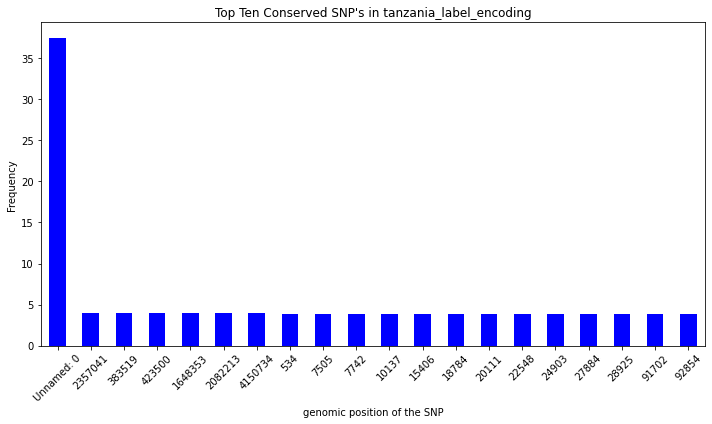

,Isolation source,category,BioSample,sra_accession,country,Unnamed: 0,23,43,480,495,...,1884443,2486379,3255422,3304922,3521343,3882388,3885740,593540,2646044,3883660
0,Faeces sampled by cloacal swab,Faeces sampled by cloacal swab,SAMN13964333,SRR11005774,tanzania,3,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,Faeces sampled by cloacal swab,Faeces sampled by cloacal swab,SAMN13964332,SRR11005775,tanzania,4,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,Faeces sampled by cloacal swab,Faeces sampled by cloacal swab,SAMN13964346,SRR11005779,tanzania,8,4,4,3,4,...,0,0,0,0,0,0,0,0,0,0
3,Faeces sampled by cloacal swab,Faeces sampled by cloacal swab,SAMN13964341,SRR11005784,tanzania,12,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,Faeces sampled by cloacal swab,Faeces sampled by cloacal swab,SAMN13964339,SRR11005786,tanzania,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,feces swine,swine,SAMN03576948,SRR4243039,tanzania,63,0,0,3,0,...,0,0,0,0,0,0,0,0,0,4
72,mastitic milk,mastitic milk,SAMN05944939,SRR4733858,tanzania,66,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
73,chicken carcass,poultry,SAMN03576809,SRR8980092,tanzania,68,0,0,3,0,...,0,0,0,0,4,0,0,0,0,4
74,feces poultry,poultry,SAMN03576806,SRR8980093,tanzania,69,0,0,3,0,...,0,0,0,0,0,0,0,0,0,4


In [87]:
# load data
df_tz=pd.read_csv("./tanzania_processed.csv")

df_tz=label_encoding_dim_reduction(df_tz,"tanzania_label_encoding")
df_tz

In [ ]:
# df_all=df_all.fillna(0)

In [12]:
df_all_dropped=df_all.drop(columns=dropped_columns)
# Calculate the correlation matrix
correlation_matrix = df_all_dropped.corr()

# Find pairs of highly correlated columns
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust the threshold as needed
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print the highly correlated pairs
for pair in highly_correlated_pairs:
    print(f"Highly correlated columns: {pair[0]} and {pair[1]}")

# Drop one column from each highly correlated pair
columns_to_drop = set()

for pair in highly_correlated_pairs:
    columns_to_drop.add(pair[1])

df_cleaned = df_all_dropped.drop(columns=columns_to_drop)

print("\nDataFrame after dropping highly correlated columns:")
df_cleaned


KeyboardInterrupt



# Feature selection

In [ ]:
# # Feature selection
# import numpy as np
# # from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import RFECV
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
# X = df_all_label_encoded.drop(columns=dropped_columns)
# y = df_all_label_encoded['category']

# # One-hot encode the target variable y
# y_encoded = pd.get_dummies(y)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# # Train the Random Forest classifier
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# # Make predictions
# y_pred = clf.predict(X_test)

# # Convert one-hot encoded predictions back to categorical labels
# y_pred_labels = y_encoded.columns[y_pred.argmax(axis=1)]

# # Calculate accuracy
# accuracy = accuracy_score(y_test.idxmax(axis=1), y_pred_labels)
# print(f'Accuracy: {accuracy:.2f}')


# one hot encoded feature importances

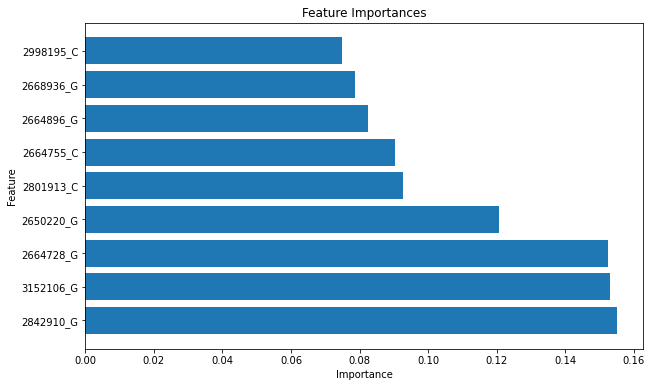

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFECV with the classifier and cross-validation settings
rfecv = RFECV(estimator=clf, step=1, cv=5)  # You can adjust step and cv as needed

# Fit RFECV to your training data
rfecv.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]

# Train the Random Forest classifier on the selected features
clf.fit(X_train[selected_features], y_train)

# Get feature importances from the trained classifier
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# label encoding feature importances

In [ ]:
# %%time
# import numpy as np
# # from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import RFECV
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# # Split data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Random Forest classifier
# # clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# # Initialize RFECV with the classifier and cross-validation settings
# rfecv = RFECV(estimator=clf, step=1, cv=5)  # You can adjust step and cv as needed
# print("starting fitting the model")

# # Fit RFECV to your training data
# rfecv.fit(X_train, y_train)
# # Get the selected features
# selected_features = X_train.columns[rfecv.support_]
# print("starting training the model")

# # Train the Random Forest classifier on the selected features
# clf.fit(X_train[selected_features], y_train)
# print("getting feature importances")

# # Get feature importances from the trained classifier
# feature_importances = clf.feature_importances_

# # Create a DataFrame to store feature importances
# feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# # Sort the DataFrame by importance
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Plot the feature importances as a horizontal bar graph
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importances')
# plt.savefig('../figures/feature_importances_label_encoded.png')
# plt.show()

In [80]:
df_modified=df_all.fillna(0)

In [ ]:
df_modified

In [ ]:
# df_modified.to_csv("training_data_encoded.csv")

In [ ]:
# common_columns

In [4]:
# import pandas as pd
# df1=pd.read_csv("./nigeria pig.csv")
# df1
# df2=pd.read_csv("./nigeria poultry.csv")
# df3=pd.read_csv("./nigeria bovine.csv")
# df_all_trial=pd.concat([df1,df2,df3])
# df_all_trial=df_all_trial.drop(columns="Unnamed: 0").fillna(0)
# df_all_trial
# # Shuffle the rows
# shuffled_df = df_all_trial.sample(frac=1).reset_index(drop=True)
# shuffled_df

In [ ]:
# df1=pd.read_csv("./nigeria pig.csv")

In [5]:
# # load data
# df_kenya=pd.read_csv("./kenya_processed.csv")
# df_kenya

In [ ]:
# def category_allocation(df_data):
#     # List of terms related to various categories
#     bovine_terms = ['cattle stool','stool (Bos taurus)','intestine cattle','GOAT','GOAT MEAT','cattle lung', 'cattle', 'beef', 'cattle stool (Bos taurus)']
#     poultry_terms = ['poultry feed', 'Poultry vendoors and farms', 'chicken heart', 'Poultry small intenstine',
#                      'Poultry carcass', 'chicken liver', 'Chicken Spleen', 'chicken', 'poultry water']
#     swine_terms=["feces swine","swine","swine stool","pig stool"]

#     # Create the dictionary for replacement
#     replacement_dict = {}
#     for term in bovine_terms:
#         replacement_dict[term] = 'bovine'
#     for term in poultry_terms:
#         replacement_dict[term] = 'poultry'
#     for term in swine_terms:
#         replacement_dict[term] = 'swine'

#     # Function to replace terms based on the dictionary
#     def replace_terms(description):
#         for term, replacement in replacement_dict.items():
#             if term in description:
#                 return replacement
#         return description

#     # Create the 'category' column using apply
#     df_data['category'] = df_data['Isolation source'].apply(replace_terms)

#     # Reorder the columns to insert 'category' as the second column
#     column_order = ['Isolation source', 'category'] + [col for col in df_data.columns if col != 'Isolation source' and col != 'category']
#     df_new = df_data[column_order]

#     return df_new

# if __name__ == "__main__":
#     parser = argparse.ArgumentParser(description="Categorize isolation sources in a DataFrame")
#     parser.add_argument("--input_file", required=True, help="Path to the input CSV file")
#     parser.add_argument("--output_file", required=True, help="Path to the output CSV file")

#     args = parser.parse_args()

#     input_file_path = args.input_file
#     output_file_path = args.output_file

#     # Read the input CSV file into a DataFrame
#     df_data = pd.read_csv(input_file_path)

#     # Call the category_allocation function
#     categorized_df = category_allocation(df_data)

#     # Save the categorized DataFrame to the output CSV file
#     categorized_df.to_csv(output_file_path, index=False)

In [ ]:
# df_k=category_allocation(df_kenya)
# df_k=df_k.drop(columns=["Unnamed: 0","Unnamed: 0.1"])
# df_k

In [ ]:
# df_k=one_hot_encoding_dim_reduction(df_k,"kenya bovine")
# df_k

In [ ]:
# missing= []
# for i in list(df_k.columns):
#     if i not in list(X.columns) and i not in dropped_columns:
#         missing.append(i)
# X_valid=df_k.drop(columns=dropped_columns)
# # Merge the DataFrames
# X_valid = X_valid.drop(columns=missing).fillna(0)
# # Identify missing columns
# colg = [col for col in X.columns if col not in df_k.columns]

# # Add missing columns to df_k with all values as 0
# for col in colg:
#     df_k[col] = 0

# # Reorder columns in df_k to match the order in X
# X_valid = df_k[X.columns]
# # Reorder columns in the merged DataFrame to match the order in df1
# # merged_df = merged_df[X.columns]
# X_valid


In [ ]:
# X_valid

In [46]:
shuffled_df

,Isolation source,category,BioSample,sra_accession,country,534_C,1242_T,1410_C,2493_G,2607_G,...,4305186_G,4521752_A,4730977_C,184314_G,387554_A,387622_G,387658_G,391456_C,1682255_C,3732615_A
0,pig stool,swine,SAMN07135270,SRR6950903,nigeria,1.0,1.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,pig stool,swine,SAMN07135230,SRR6950999,nigeria,1.0,1.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chicken liver,poultry,SAMN11897888,SRR9165260,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Poultry carcass,poultry,SAMEA6848052,ERR4181906,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Poultry vendoors and farms,poultry,SAMEA6869864,ERR4183584,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Poultry carcass,poultry,SAMEA6848044,ERR4181898,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275,pig stool,swine,SAMN07135155,SRR7763499,nigeria,1.0,1.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,stool (Bos taurus),bovine,SAMN07774653,SRR9200758,nigeria,1.0,1.0,0.0,0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
277,cattle stool (Bos taurus),bovine,SAMN07162990,SRR5598927,nigeria,1.0,1.0,0.0,1,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Feature selection based on Nucleotide composition

In [6]:
df1=pd.read_csv("nigeria-df_bovine_label_encoding_custom_label_encoded.csv")
df1
df2=pd.read_csv("nigeria-df_pig_label_encoding_custom_label_encoded.csv")
df2
# df2=pd.read_csv("nigeria-poultry_label_custom_label_encoded.csv")
# df2


,Isolation source,category,BioSample,sra_accession,country,534,646,681,793,1047,...,2204997,92161,219591,1892467,2031386,2595382,4471229,435879,3503680,4720760
0,pig stool,swine,SAMN07135307,SRR6950097,nigeria,4,2,4,4,2,...,0,0,0,0,0,0,0,0,0,0
1,pig stool,swine,SAMN07135306,SRR6950133,nigeria,4,2,4,4,2,...,0,0,0,0,0,0,0,0,0,0
2,pig stool,swine,SAMN07135305,SRR6950194,nigeria,4,2,4,4,2,...,0,0,0,0,0,0,0,0,0,0
3,pig stool,swine,SAMN07135304,SRR6950215,nigeria,4,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,pig stool,swine,SAMN07135293,SRR6950217,nigeria,4,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,4,2,4,4,0,...,0,0,0,4,0,0,0,0,0,0
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,4,2,4,4,0,...,4,0,4,4,0,4,4,0,0,0
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,4,2,0,4,0,...,0,0,4,0,4,0,0,0,4,0
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,4,0,4,4,2,...,0,4,0,4,4,0,0,0,0,4


In [24]:
import pandas as pd
import numpy as np

# Define a function to calculate allele frequency
def allele_frequency(column):
    unique_values, counts = np.unique(column, return_counts=True)
    freq_dict = dict(zip(unique_values, counts / len(column)))
    return freq_dict

# Define a function to compare allele frequencies
def similar_snps(column1, column2, threshold=0.9):
    freq1 = allele_frequency(column1)
    freq2 = allele_frequency(column2)
    
    common_alleles = set(freq1.keys()) & set(freq2.keys())
    conservation = sum(min(freq1.get(allele, 0), freq2.get(allele, 0)) for allele in common_alleles)
    
    return conservation >= threshold

def remove_similar_columns(df1, df2, threshold=0.9):
    common_columns = []

    for col in df1.columns:
        if col in df2.columns:
            if similar_snps(df1[col], df2[col], threshold=threshold):
                common_columns.append(col)

    result_df1 = df1.drop(columns=common_columns)
    result_df2 = df2.drop(columns=common_columns)

    return result_df1, result_df2

def find_columns_with_many_unique_values(df, unique_threshold=2):
    return df.columns[df.apply(lambda col: col.nunique() > unique_threshold)]

def count_values_in_rows(df, values_to_count):
    new_features = df.apply(lambda row: [row.tolist().count(value) for value in values_to_count], axis=1)
    new_features_df = pd.DataFrame(new_features.tolist(), columns=values_to_count, index=df.index)
    return new_features_df

df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)

# Find columns with more than two unique values
columns_with_many_unique_values = find_columns_with_many_unique_values(df1)
print("Columns with more than two unique values:")
print(columns_with_many_unique_values)

# Remove similar columns
result_df1, result_df2 = remove_similar_columns(df1, df2, threshold=0.9)

# Count values in rows and create new features DataFrames
values_to_count = [0, 1, 2, 3,4]
result_df1_new = count_values_in_rows(result_df1, values_to_count)
result_df2_new = count_values_in_rows(result_df2, values_to_count)


print("\nOriginal DataFrame 1:")
print(df1)
print("\nOriginal DataFrame 2:")
print(df2)
print("\nDataFrame 1 after removing similar columns:")
print(result_df1_new)
print("\nDataFrame 2 after removing similar columns:")
print(result_df2_new)


Columns with more than two unique values:
Index(['Isolation source', 'BioSample', 'sra_accession', '6239', '7205',
       '7417', '11361', '11405', '12732', '16829',
       ...
       '2106482', '66095', '1735396', '1961752', '1717967', '3634031',
       '3125967', '3968375', '187236', '116371'],
      dtype='object', length=3570)

Original DataFrame 1:
              Isolation source category     BioSample sra_accession  country  \
0    cattle stool (Bos taurus)   bovine  SAMN07163935    SRR5627235  nigeria   
1    cattle stool (Bos taurus)   bovine  SAMN07163938    SRR5627238  nigeria   
2    cattle stool (Bos taurus)   bovine  SAMN07163941    SRR5627163  nigeria   
3    cattle stool (Bos taurus)   bovine  SAMN07163937    SRR5627236  nigeria   
4    cattle stool (Bos taurus)   bovine  SAMN07163936    SRR5627241  nigeria   
..                         ...      ...           ...           ...      ...   
99                        beef   bovine  SAMN31852854   SRR22395760  nigeria   
100 

In [27]:
df_all=pd.concat([result_df1_new,result_df2_new,])
df_all
X=df_all.fillna(0)
X

,0,1,2,3,4
0,6110,393,1932,3726,3909
1,6465,405,1898,3574,3726
2,6188,410,1953,3727,3790
3,6845,408,1794,3425,3592
4,6133,421,2005,3733,3776
...,...,...,...,...,...
86,7443,668,2041,3076,3153
87,7729,672,1962,2932,3082
88,10534,460,1259,2016,2117
89,7448,673,2046,3038,3175


In [28]:
df_origin=pd.concat([df1,df2])
df_origin

,Isolation source,category,BioSample,sra_accession,country,480,534,646,681,793,...,4393282,4446805,4555613,4568565,4702829,4702842,4734114,4836103,219591,4720760
0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,3,4,2,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,3,4,2,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,3,4,2,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,3,4,0,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,3,4,2,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,3,4,2,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,3,4,2,4,4,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,3,4,2,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,3,4,0,4,4,...,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0


In [29]:
y=df_origin["category"]
y

0     bovine
1     bovine
2     bovine
3     bovine
4     bovine
       ...  
86     swine
87     swine
88     swine
89     swine
90     swine
Name: category, Length: 195, dtype: object

Accuracy: 0.9795918367346939
1: 0.6472560850446419
2: 0.2029770380761559
3: 0.06639784779317058
4: 0.044219788143697744
0: 0.03914924094233389


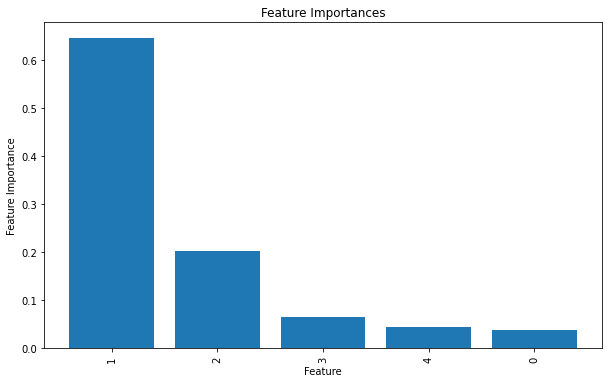

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_all, y)

# Initialize and fit a Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the feature names
feature_names = X_train.columns

# Print feature importances
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices])
plt.xticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

In [50]:
y_test

70      swine
56      swine
17      swine
51      swine
16      swine
6       swine
95     bovine
82      swine
78      swine
52      swine
67     bovine
63      swine
84     bovine
46      swine
54     bovine
65     bovine
8       swine
4       swine
69      swine
87     bovine
96     bovine
25     bovine
23      swine
66     bovine
13      swine
76      swine
81     bovine
79      swine
49     bovine
36      swine
29      swine
14      swine
59      swine
32      swine
27      swine
46     bovine
13     bovine
21     bovine
88      swine
35      swine
77      swine
16     bovine
70     bovine
42      swine
30     bovine
94     bovine
102    bovine
60     bovine
39     bovine
Name: category, dtype: object

In [ ]:
# Plotting training and Validation accuracy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming you have defined X_train, y_train, X_val, and y_val as in your code

# Initialize a random forest classifier
rf_classifier = RandomForestClassifier()

# Calculate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Random Forest Classifier - Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.01, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Accuracy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
         label="Validation Accuracy")

plt.legend(loc="best")
plt.show()


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder
# # Assuming you have a target column named 'target'
# dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']

# X = df_all_label_encoded.drop(columns=dropped_columns)
# y = df_all_label_encoded['category']
# label_encoder = LabelEncoder()
# # Fit the label encoder on the labels and transform them
# encoded_labels = label_encoder.fit_transform(y)
# encoded_labels
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels)

# # Initialize and train a random forest classifier
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)

# # Predict on the test set
# y_pred = rf_classifier.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [ ]:
# from sklearn.model_selection import cross_val_score

# # Initialize the random forest classifier
# rf_classifier = RandomForestClassifier()

# # Perform cross-validation
# scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation
# mean_accuracy = scores.mean()

# print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.2f}")


In [57]:
# # Predict on the validation set
# y_pred_valid = rf_classifier.predict(X_valid)

# # Calculate accuracy on the validation set
# accuracy_valid = accuracy_score(y_valid, y_pred_valid)
# print(f"Validation Accuracy: {accuracy_valid:.2f}")

In [58]:
# USe KN for exploration
# n_clusters = 3

# # Assuming X_train is your training data in numeric format (remove the astype(str) line)
# # X_train = ...

# # Cluster the training data using KMeans
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# cluster_labels = kmeans.fit_predict(X_train)

# # Calculate cluster centers
# cluster_centers = kmeans.cluster_centers_

# # Calculate the closest point in each cluster to the centroid
# closest_samples = pairwise_distances_argmin_min(cluster_centers, X_train)[0]

# # Calculate mean differences between cluster centers and closest samples
# mean_differences = np.abs(cluster_centers - X_train[closest_samples]).mean(axis=0)

# # Now you can proceed with sorting the feature indices and accessing column names
# sorted_feature_indices = np.argsort(mean_differences)[::-1]

# # Assuming X_train is a DataFrame and you want to access column names
# # sorted_column_names = X_train.columns[sorted_feature_indices]

# # Print sorted feature column names by importance
# # print("Sorted feature column names by importance:", sorted_column_names)

In [59]:
# X_valid.shape

In [60]:
# y_valid

In [95]:
# All countries
# Nigeria
df_nigeria_bovine=pd.read_csv("nigeria-df_bovine_label_encoding_custom_label_encoded.csv")
df_swine=pd.read_csv("nigeria-df_pig_label_encoding_custom_label_encoded.csv")
df_poultry=pd.read_csv("nigeria-poultry_label_custom_label_encoded.csv")
# Senegal
df_senegal=pd.read_csv("senegal_label_encoding_custom_label_encoded.csv")

# Kenya
df_kenya=pd.read_csv("kenya_label_encoding_custom_label_encoded.csv")
# Tanzania
df_tz=pd.read_csv("tanzania_label_encoding_custom_label_encoded.csv")

# # tunisia
df_tunisia=pd.read_csv("tunisia_label_encoding_custom_label_encoded.csv")
#morocco
# df_morocco=pd.read_csv("morocco_label_encoding_custom_label_encoded.csv")

# Mauritias
df_mauritias=pd.read_csv("mauritias_label_encoding_custom_label_encoded.csv")
# South Africa
df_sa=pd.read_csv("south_africa_label_encoding_custom_label_encoded.csv")


In [96]:
df_all=pd.concat([df_nigeria_bovine,df_swine,df_poultry,df_senegal,df_kenya,df_tz,df_tunisia,df_mauritias,df_sa])

In [97]:
df_all

,Isolation source,category,BioSample,sra_accession,country,480,534,646,681,793,...,2030247,2377766,2598379,2814783,3716166,3888876,4266800,4266830,4361572,4548647
0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,3.0,4.0,2.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,3.0,4.0,2.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,3.0,4.0,2.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,3.0,4.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,3.0,4.0,2.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Poultry (Meat),poultry,SAMN19025268,SRR14434490,south_africa,3.0,4.0,2.0,NaN,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,Bovine (Fecal),bovine,SAMN19025267,SRR14434491,south_africa,3.0,4.0,2.0,NaN,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,Bovine (Fecal),bovine,SAMN19025266,SRR14434492,south_africa,3.0,4.0,2.0,NaN,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,Bovine (Fecal),bovine,SAMN19025257,SRR14434493,south_africa,3.0,4.0,2.0,NaN,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df_all=df_all.fillna(0)
df_all.to_csv("merged_training_data.csv")

In [99]:
# Remove constant columns that are in mor than 90% of the samples
# Calculate the threshold for column removal
threshold = 0.9 * len(df_all)
# List to store the column names to be removed
columns_to_remove = []
# Iterate through each column
for column in df_all.columns:
    # Count the occurrences of the most frequent value in the column
    max_value_count = df_all[column].value_counts().max()
    # If the most frequent value count is greater than the threshold, or all values are the same
    if max_value_count > threshold or df_all[column].nunique() == 1:
        columns_to_remove.append(column)

# Remove the identified columns
df_filtered = df_all.drop(columns=columns_to_remove)
# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv("filtered_SNP_training_data.csv", index=False)


In [100]:
df_filtered

,Isolation source,category,BioSample,sra_accession,country,480,534,646,681,793,...,4824043,4825851,396260,577679,3576077,4392817,4524297,372920,372994,3520230
0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,3.0,4.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,3.0,4.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,3.0,4.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,3.0,4.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,3.0,4.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Poultry (Meat),poultry,SAMN19025268,SRR14434490,south_africa,3.0,4.0,2.0,0.0,4.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0
40,Bovine (Fecal),bovine,SAMN19025267,SRR14434491,south_africa,3.0,4.0,2.0,0.0,4.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,3.0
41,Bovine (Fecal),bovine,SAMN19025266,SRR14434492,south_africa,3.0,4.0,2.0,0.0,4.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,3.0
42,Bovine (Fecal),bovine,SAMN19025257,SRR14434493,south_africa,3.0,4.0,2.0,0.0,4.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0
